<a href="https://colab.research.google.com/github/JingwenLuo7/ComplexSystem/blob/main/Project_BlockII/PQR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Test

## Numerical Simulation of the PQR System
We implement the ODEs in Python and use scipy.integrate.solve_ivp to integrate forward in time

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Define parameters
a, b = 0.1, 0.1
V1, V2, V3, V4 = 1.0, 1.5, 6.0, 2.5
K, K1, K2, K3, K4 = 0.2, 0.01, 0.01, 0.01, 0.01

# Define the PQR ODE system
def pqr(t, y):
    P, Q, R = y
    dP = a*Q - b * P/(K + P)
    dQ = V1*(1 - Q)/(K1 + (1 - Q)) - V2 * R * Q/(K2 + Q)
    dR = V3*P * (1 - R)/(K3 + (1 - R)) - V4 * R/(K4 + R)
    return [dP, dQ, dR]


## Figure 2. Threshold dependence of R on P and of Q on R.

In [ ]:

# 定义仅含 R 的微分方程（P 为常量参数）
def dR_dt(t, R, P):
    R = R[0]
    return [V3*P*(1-R)/(K3 + (1-R)) - V4*R/(K4 + R)]

# 定义仅含 Q 的微分方程（R 为常量参数）
def dQ_dt(t, Q, R):
    Q = Q[0]
    return [V1*(1-Q)/(K1 + (1-Q)) - V2*R*Q/(K2 + Q)]

# 计算 R 随 P 变化的稳态值
P_vals = np.linspace(0, 1, 101)
R_ss = np.zeros_like(P_vals)
for i, P in enumerate(P_vals):
    sol = solve_ivp(dR_dt, [0, 200], [0.0], args=(P,), rtol=1e-6, atol=1e-9)
    R_ss[i] = sol.y[0, -1]

# 计算 Q 随 R 变化的稳态值
R_vals = np.linspace(0, 1, 101)
Q_ss = np.zeros_like(R_vals)
for i, R in enumerate(R_vals):
    sol = solve_ivp(dQ_dt, [0, 200], [0.0], args=(R,), rtol=1e-6, atol=1e-9)
    Q_ss[i] = sol.y[0, -1]



估算阈值: P* ≈ 0.410, R* ≈ 0.660


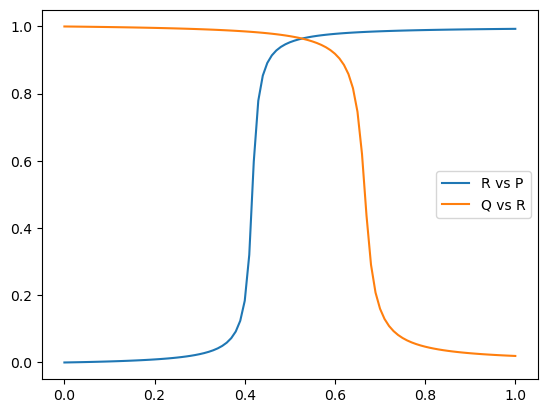

In [ ]:
# 估算 P*：R_ss 对 P 的变化中突变点
dR = np.diff(R_ss)
P_jump_idx = np.where(dR > 0.15)[0]
P_star_est = P_vals[P_jump_idx[0]] if len(P_jump_idx) > 0 else np.nan

# 估算 R*：Q_ss 对 R 的变化中突变点
dQ = np.diff(Q_ss)
R_jump_idx = np.where(dQ < -0.15)[0]
R_star_est = R_vals[R_jump_idx[0]] if len(R_jump_idx) > 0 else np.nan

print(f"估算阈值: P* ≈ {P_star_est:.3f}, R* ≈ {R_star_est:.3f}")

plt.plot(P_vals, R_ss, label='R vs P')
plt.plot(R_vals, Q_ss, label='Q vs R')
plt.legend()
plt.show()



## Figure 3. Sustained oscillations generated by the model for weight cycling.

Figure 3A. Time evolution of excess weight P (in blue), degree R of cognitive restraint (in green), and fraction Q of maximum dietary intake in excess of a basal value (in red).

In [ ]:
def plot_timeEvo(P,Q,R,t):
    fig, ax = plt.subplots(figsize=(8, 5))

    # curves for R, Q, R
    ax.plot(t, P, color='blue', linestyle='-')   # P-IC1 实线
    ax.plot(t, Q, color='red', linestyle='-')    # Q-IC1 实线
    ax.plot(t, R, color='green', linestyle='-')  # R-IC1 实线

    # axis label
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_title('Time Evolution of P, Q, and R', fontsize=14)

    # legend
    blue_line = mlines.Line2D([], [], color='blue', label='P (excess weight)')
    red_line = mlines.Line2D([], [], color='red', label='Q (dietary intake)')
    green_line = mlines.Line2D([], [], color='green', label='R (cognitive restraint)')
    ax.legend(handles=[blue_line, red_line, green_line],
              loc='upper right',frameon=False, fontsize=10,
              bbox_to_anchor=(1.35, 0.95))

    plt.tight_layout()
    plt.subplots_adjust(right=0.85)  # 为右侧图例留空间（方案1需要时）
    plt.show()

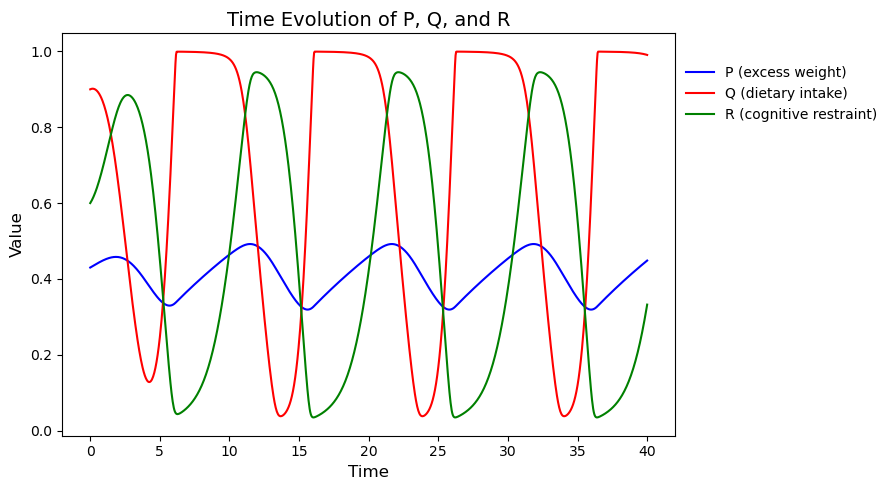

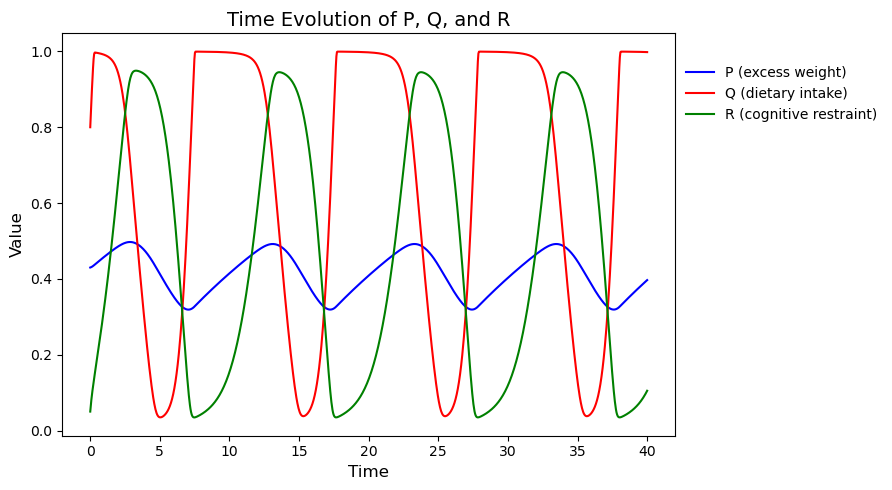

In [ ]:
# Time span and evaluation points
t_span = (0, 40)
t_eval = np.linspace(*t_span, 1001)

# Initial conditions (two sets)
y0_1 = [0.43, 0.90, 0.60]
y0_2 = [0.43, 0.80, 0.05]

# Integrate the ODE for both sets
sol1 = solve_ivp(pqr, t_span, y0_1, t_eval=t_eval, rtol=1e-6)
sol2 = solve_ivp(pqr, t_span, y0_2, t_eval=t_eval, rtol=1e-6)

# Extract solutions
t = sol1.t
P1, Q1, R1 = sol1.y
P2, Q2, R2 = sol2.y

# Plot P, Q, R over time


plot_timeEvo(P1,Q1,R1,t)
plot_timeEvo(P2,Q2,R2,t)


(B) The oscillations correspond to the evolution towards a limit cycle shown here in the (P, R) plane as a projection of the trajectory followed by the 3-variable system governed by eqs (1a-c). The same closed curve, known as a limit cycle, is reached from two distinct initial conditions: P=0.43, Q=0.9, R=0.6 (green trajectory), and P=0.43, Q=0.8, R=0.05 (blue trajectory, which merges with the green one), corresponding to points located inside and outside the limit cycle, respectively. To match typical durations of weight cycles, time in (A) should be expressed in units of the order of one week to one month. The curves are obtained by numerical integration of eqs (1a-c), using the Berkeley Madonna program. Parameter values are as in figure 2.

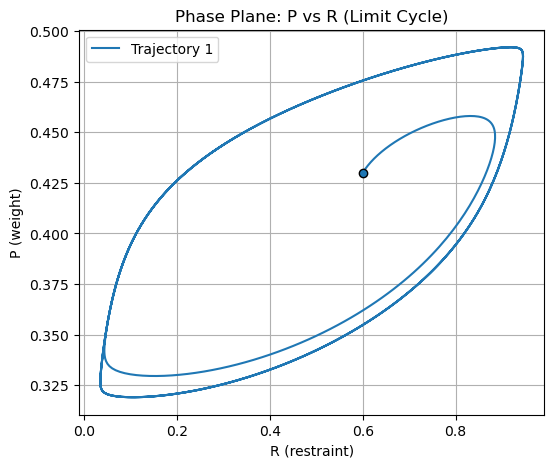

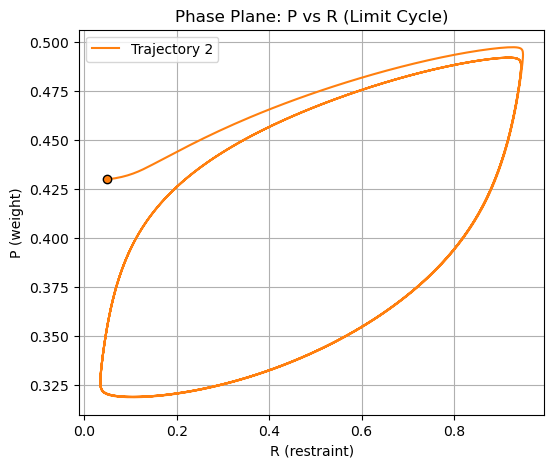

In [ ]:
def plot_traj(R,P,c,l):
    plt.figure(figsize=(6,5))
    # Plot the trajectories in P-R plane
    plt.plot(R, P, color = c, label=l)
    # Mark initial points
    plt.scatter(R[0], P[0], color=c, edgecolors='k', zorder=5)
    plt.ylabel('P (weight)')
    plt.xlabel('R (restraint)')
    plt.title('Phase Plane: P vs R (Limit Cycle)')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_traj(R1,P1,'C0','Trajectory 1')
plot_traj(R2,P2,'C1','Trajectory 2')

## Figure 4

C:\Users\95168\AppData\Local\Temp\ipykernel_20560\488405041.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  M1 = P / (K1 + P)
C:\Users\95168\AppData\Local\Temp\ipykernel_20560\488405041.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  M2 = P / (K2 + P)
C:\Users\95168\AppData\Local\Temp\ipykernel_20560\488405041.py:7: RuntimeWarning: invalid value encountered in scalar divide
  M3 = R / (K3 + R)
C:\Users\95168\AppData\Local\Temp\ipykernel_20560\488405041.py:8: RuntimeWarning: invalid value encountered in scalar divide
  M4 = R / (K4 + R)


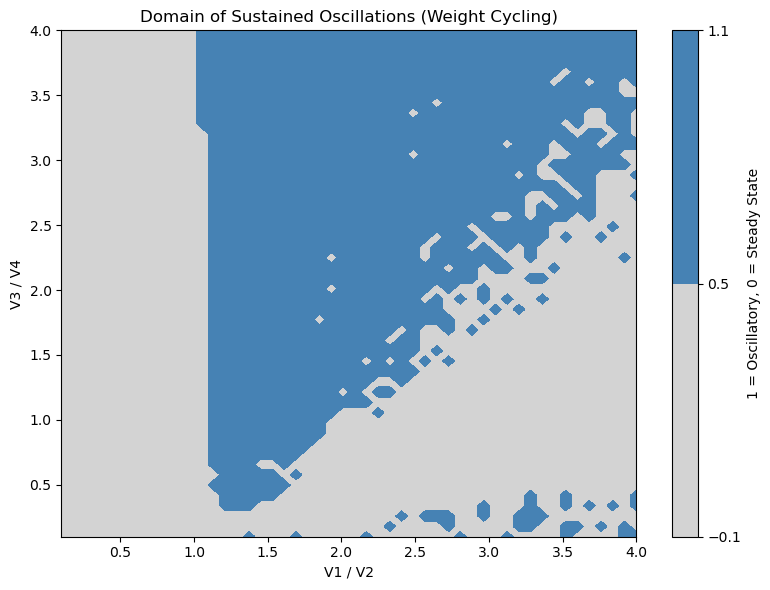

In [ ]:
def model(t, y, params):
    P, Q, R = y
    a, b, V1, V2, V3, V4, K, K1, K2, K3, K4 = params

    M1 = P / (K1 + P)
    M2 = P / (K2 + P)
    M3 = R / (K3 + R)
    M4 = R / (K4 + R)

    dP_dt = a * (Q - K * P)
    dQ_dt = -V1 * M3 + V2 * (1 - Q)
    dR_dt = V3 * M2 * (1 - R) - V4 * M4 * R

    return [dP_dt, dQ_dt, dR_dt]

def is_oscillatory(sol, threshold=0.02):
    P = sol.y[0]
    last_window = P[-100:]
    return np.ptp(last_window) > threshold  # peak-to-peak > threshold


def plot_weight_cycling_domain():
    # 固定值
    a = b = 0.1
    V2 = 1.5
    V4 = 2.5
    K = 0.2
    K1 = K2 = K3 = K4 = 0.01

    # 扫描参数比值
    V1_V2_vals = np.linspace(0.1, 4.0, 50)
    V3_V4_vals = np.linspace(0.1, 4.0, 50)

    result_matrix = np.zeros((len(V3_V4_vals), len(V1_V2_vals)))

    t_span = (0, 1000)
    t_eval = np.linspace(*t_span, 2000)
    y0 = [0.25, 0.9, 0.02]

    for i, V1_V2 in enumerate(V1_V2_vals):
        V1 = V1_V2 * V2
        for j, V3_V4 in enumerate(V3_V4_vals):
            V3 = V3_V4 * V4
            params = [a, b, V1, V2, V3, V4, K, K1, K2, K3, K4]
            sol = solve_ivp(model, t_span, y0, args=(params,), t_eval=t_eval)
            result_matrix[j, i] = 1 if is_oscillatory(sol) else 0

    # 绘图
    plt.figure(figsize=(8, 6))
    plt.contourf(V1_V2_vals, V3_V4_vals, result_matrix, levels=[-0.1, 0.5, 1.1], colors=['lightgrey', 'steelblue'])
    plt.xlabel('V1 / V2')
    plt.ylabel('V3 / V4')
    plt.title('Domain of Sustained Oscillations (Weight Cycling)')
    plt.colorbar(label='1 = Oscillatory, 0 = Steady State')
    plt.tight_layout()
    plt.show()

plot_weight_cycling_domain()


In [ ]:
# 固定参数值
a = b = 0.1
V2 = 1.5
V4 = 2.5
K = 0.2
K1 = K2 = K3 = K4 = 0.01

# 横纵坐标范围：V1/V2 和 V3/V4
V1_V2_vals = np.linspace(0.1, 4.0, 50)
V3_V4_vals = np.linspace(0.1, 4.0, 50)

result_matrix = np.zeros((len(V3_V4_vals), len(V1_V2_vals)))

# 初始条件
y0 = [0.25, 0.9, 0.02]
t_span = (0, 1000)
t_eval = np.linspace(*t_span, 2000)

for i, V1_V2 in enumerate(V1_V2_vals):
    V1 = V1_V2 * V2
    for j, V3_V4 in enumerate(V3_V4_vals):
        V3 = V3_V4 * V4
        params = [a, b, V1, V2, V3, V4, K, K1, K2, K3, K4]

        try:
            sol = solve_ivp(model, t_span, y0, args=(params,), t_eval=t_eval, rtol=1e-6, atol=1e-8)
            result_matrix[j, i] = 1 if is_oscillatory(sol) else 0
        except:
            result_matrix[j, i] = np.nan  # 用于捕捉收敛失败的点

# 绘图
plt.figure(figsize=(8, 6))
plt.contourf(V1_V2_vals, V3_V4_vals, result_matrix, levels=[-0.1, 0.5, 1.1], colors=["lightgrey", "steelblue"])
plt.xlabel("V1 / V2")
plt.ylabel("V3 / V4")
plt.title("Figure 5: Domain of Weight Cycling in (V1/V2, V3/V4) Space")
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["Steady state", "Weight cycling"])
plt.tight_layout()
plt.show()


振荡域布尔矩阵 (True 表示振荡):
[[1 1 0 1 1]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]]
